## ICE-8 Image Filtering

## (Tutorial) CNN
Feature detectors can be set up with different values to get different results.

For example, a filter can be applied that can sharpen and focus an image or blur an image. That would give equal importance to all the values. You can do edge enhancement, edge detection, and more. You would do that by applying different feature detectors to create different feature maps. The computer is able to determine which filters make the most sense and apply them.

The primary purpose here is to find features in your image, put them into a feature map, and still preserve the spatial relationship between pixels. That’s important so that the pixels don’t get all jumbled up.

* use pip install opencv-python to install cv2


Use this image https://drive.google.com/file/d/1OFAD7GGVQeKYPyp-0XZn3cxR4h9FblIz/view?usp=sharing

We’re going to use this above given image for our input image.

We’ll make it black and white

### **Upload the image above as cat.jpg in your notebook for the tutorial to work**

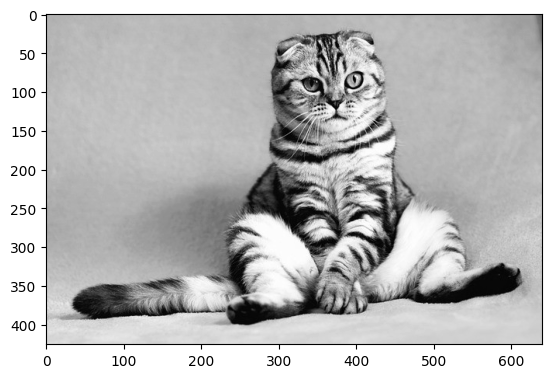

In [1]:
!pip install opencv-python
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
img_path = 'cat.jpg'
# Load color image
bgr_img = cv2.imread(img_path)
# Convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
# Normalize, rescale entries to lie in [0,1]
gray_img = gray_img.astype("float32")/255
# Plot image
plt.imshow(gray_img, cmap='gray')
plt.show()

In [2]:
#Let’s define and visualize our filters

import numpy as np
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])
print('Filter shape: ', filter_vals.shape)

Filter shape:  (4, 4)


In [3]:
# Define four different filters, all of which are linear combinations of the `filter_vals` defined above
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])
# Print out the values of filter 1 as an example
print('Filter 1: \n', filter_1)

Filter 1: 
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]


In [4]:
#Now let’s define a convolutional layer (using PyTorch)


import torch
import torch.nn as nn
import torch.nn.functional as F

# Neural network with one convolutional layer with four filters
class Net(nn.Module):

    def __init__(self, weight):
        super(Net, self).__init__()
        # Initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        # Assumes there are 4 grayscale filters
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)
    def forward(self, x):
            # Calculates the output of a convolutional layer pre- and post-activation
            conv_x = self.conv(x)
            activated_x = F.relu(conv_x)

            # Returns both layers
            return conv_x, activated_x

# Instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)
# Print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


In [5]:
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))

    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # Grab layer outputs
        ax.imshow(np.squeeze(np.array(layer[0,i])), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

## Task 1. Write code for the following tasks below :

- Plot original image
- Visualize all of the filters (4)
- Convert the image into an input tensor


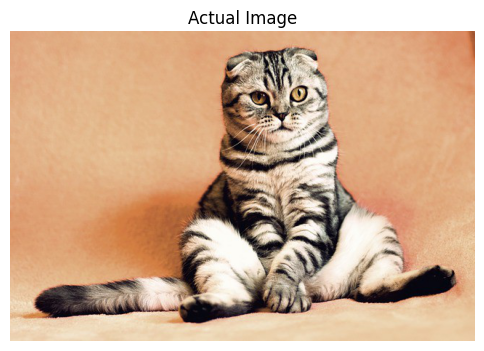

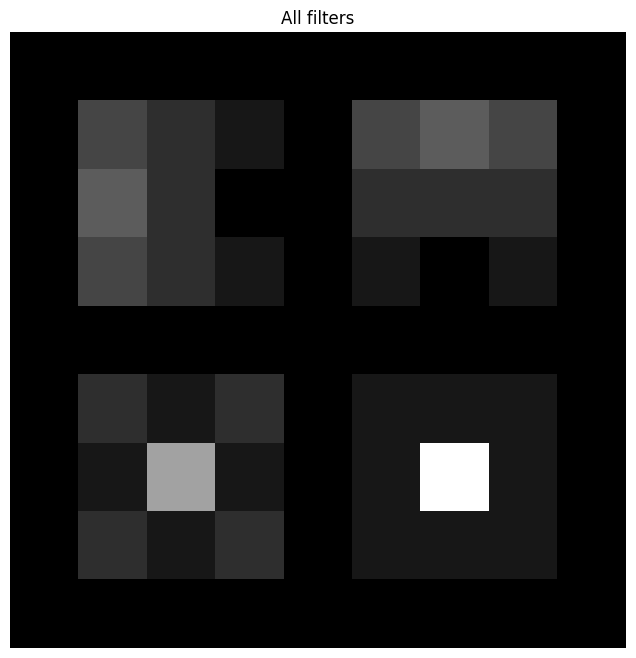

In [6]:
import torchvision.transforms as transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np

# Loading cat image
cat_image = plt.imread('cat.jpg')

# Task 1: Plot original image
plt.figure(figsize=(6, 6))
plt.imshow(cat_image)
plt.axis('off')
plt.title('Actual Image')
plt.show()

# all four filters of image
filter_1 = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
filter_2 = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
filter_3 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
filter_4 = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
filters = np.array([filter_1, filter_2, filter_3, filter_4])

# Transforming filters to tensor using torch
Ftensor = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)

fgrid = make_grid(Ftensor, nrow=2, normalize=True, padding=1)
plt.figure(figsize=(8, 8))
plt.imshow(fgrid.permute(1, 2, 0))
plt.axis('off')
plt.title('All filters')
plt.show()

# 3 image into input tensor
transformimg = transforms.Compose([
    transforms.ToTensor(),
])
InputTensor = transformimg(cat_image)


## Task 2. Write code for the following tasks below :

- Get the convolutional layer (pre and post activation)
   
   variables to use are **conv_lyr, changed_lyr**

- Visualize the output of a convolutional layer

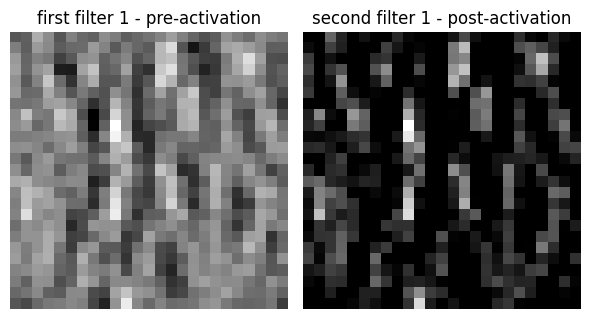

In [8]:
import matplotlib.pyplot as plt

# Generating random data sample
rand_data = torch.randn(1, 1, 28, 28)

# Extracting convolutional layer outputs
conv_lyr, changed_lyr = model.forward(rand_data)

# Convert the outputs to numpy arrays
convol_out = conv_lyr.detach().numpy()
activa_out = changed_lyr.detach().numpy()

# Get the shape of the outputs
numberof_filters, _, output_height, output_width = convol_out.shape

# Visualize the outputs
fig, ax = plt.subplots(nrows=numberof_filters, ncols=2, figsize=(6, 6))

for i, (convol_img, activa_img) in enumerate(zip(convol_out, activa_out)):
    # displaying pre activation output
    ax[i].imshow(convol_img[0], cmap='gray')
    ax[i].set_title('first filter {} - pre-activation'.format(i+1))
    ax[i].axis('off')

    # displaying post activation output
    ax[i + numberof_filters].imshow(activa_img[0], cmap='gray')
    ax[i + numberof_filters].set_title('second filter {} - post-activation'.format(i+1))
    ax[i + numberof_filters].axis('off')

plt.tight_layout()
plt.show()


## Task 3. Write code for the following tasks below :

### - convert image to grayscale for filtering and print it

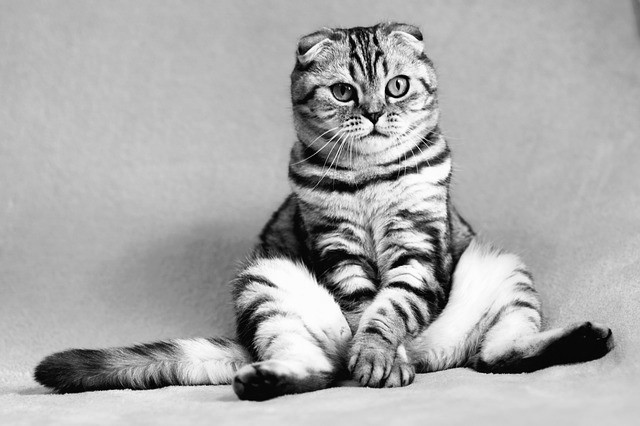

In [9]:
#code here
from PIL import Image
# reading the image
cat_image = Image.open('cat.jpg')

# color image to grayscale image
Gray_img = cat_image.convert('L')

# displaying grayscale image
Gray_img.show()

## Task 4. Write code for the following tasks below :

 - create a custom kernel and apply edge detection filter and print it

##HINT : Sobel operator

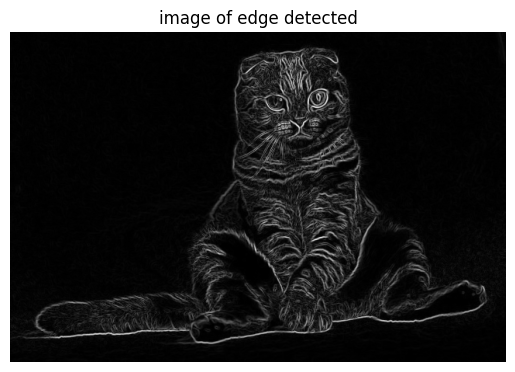

In [10]:
#code here
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

# instantiating kernal of sobel operator
Sob_X = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

Sob_Y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])
# read the image
img = plt.imread('cat.jpg')
Gray_img = np.mean(img, axis=2)

# edge detector using sobel operator
Grad_X = ndimage.convolve(Gray_img, Sob_X)
Grad_Y = ndimage.convolve(Gray_img, Sob_Y)
Edge_img = np.hypot(Grad_X, Grad_Y)

# standardising the edge detector for plotting
Edge_img = Edge_img / np.max(Edge_img)

# displaying the edge detected image
plt.imshow(Edge_img, cmap='gray')
plt.axis('off')
plt.title('image of edge detected')
plt.show()


## Question 1. What are different types of edge detection filters .

State why sobel operator is useful here .

What did we acheive from it ?

Types of edge detection filters:
1. Scharr operator
2. Sobel operator
3. Laplacian of Gaussian(LoG)
4. Roberts operator

These are all the different types of edge detection filters.

Sobel operator usage:
Sobel opearator is useful here allows it to capture edges in different orientations accurately.The Sobel operator involves straightforward convolution operations with small kernels. It is computationally efficient and can be implemented easily in real-time applications.It helps reduce the impact of noise on edge detection.

We can achieve things from the sobel operator , it can find out the boundaries between the different regions in the image. It can extract important information about the image. By removing the noise in the image it can enhance the image .


## Task 5. No need to code for this task

### **If all tasks above are done properly this task will work**

#### HINT : read task 2 question properly as I have pointed out what variable name to use which is used in this task


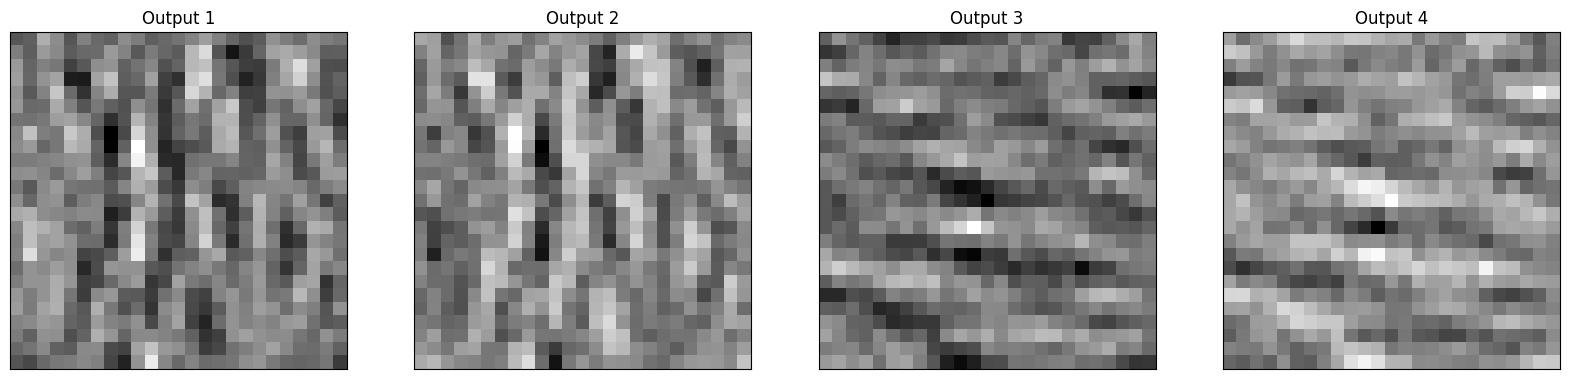

In [12]:
viz_layer(convol_out)

## Question 2. What are different types of edge detection filters .
#### HINT : Please refer lecture 8 slides .

Task 5 falls under which **building block of CNN**
Explain the importance of that block in CNN.
Explain why that block helps in task 5 and what it did .

Edge detection filters:
Scharr operator,
Sobel operator,
Laplacian of Gaussian(LoG),
Roberts operator these are all the edge detection filters to reduce the noise in the image.

Building blocks of CNN:
1) Convolutional layer
2) ReLu layer
3) Pooling
4) Flattening
5) Fully connected layer

These are all the building blocks of CNN . These will help image to find the edge detection using filters methods.
These filters slide over the input data, performing element-wise multiplication and aggregation to produce feature maps. During training, CNNs automatically learn the values of these filters based on the objective function and the provided training data.
The initial layers of a CNN learn low-level features such as edges, corners, and textures. These low-level features are important building blocks for detecting edges.
By adjusting the weights of the filters during training, the CNN learns to activate when it encounters edges of different orientations, strengths, or structures.
CNNs employ non-linear activation functions (such as ReLU, sigmoid, or tanh) after each convolutional layer.
By incorporating convolutional layers and utilizing the learning capabilities of CNNs, edge detection filters can be learned directly from data. The CNN learns to detect edges by discovering patterns and gradients that best differentiate between different image regions.